# Predicting Heart Disease Through Classification with Health Indicators

Sebastian Yeo

## 1. Introduction

   Heart disease refers to a varying number of heart related conditions that may include arrhythmias, heart attack, or even heart failure. There are several risk factors that may contribute to the development of heart disease including unhealthy lifestyle, genetics, smoking, and more. In particular, high blood pressure and high cholesterol are main factors that may contribute to the development of heart disease (About heart disease 2022).  
   
   Using the “Heart Disease Data Set” from UCI’s Machine Learning Repository, this data analysis explores the relationship between heart disease and health variables including: age, chest pain, exercise induced angina, maximum heart rate achieved, vessels coloured by fluoroscopy, resting ECG measurements, sex, slope of peak exercise in ST segment, resting/exercise induced ST depression and thalassemia using a classification model. These variables were chosen based on exploration of their relationships with heart disease risk through visualizations. The variables that showed a trend in relation to heart disease risk were chosen for the classification. The specific data set from Cleveland was chosen due to the prevalence of heart disease related to lifestyle and health factors in the United States (U.S. health care from a global perspective, 2019: Higher spending, worse outcomes? 2020). The data set includes health related test results collected from about 300 patients in Cleveland and originates from the Cleveland Clinic Foundation. 
   
   In terms of the variables used, age relates to years lived, chest pain rates pain on a scale, and angina is exercised induced chest pain. Maximum heart rate looks at how high of a heart rate an individual can achieve, usually through exercise, and may indicate heart fitness. Other variables include results from fluoroscopy and ECGs. For instance, ST depression describes an abnormally low portion of the ST segment (area between QRS complex and T wave) on an electrocardiogram (ECG) reading (Rowden, 2022). ST depression may indicate several heart related health conditions. Finally, thalassemia is an inherited blood disorder.
   
   Various classification models will be created which will classify the chosen variables and be used to predict heart disease risk. The following models were used to attempt to classify the risk of each individual: KNN, Logistical Regression, SVM, Decision Tree, Random Forest and Gradien boosting



## 2. Methods and Results

### 2.1 Reading the data

Required libraries are loaded below.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from pandas.plotting import scatter_matrix

The "Heart Disease Data Set" from the UCI Machine Learning Repository is read in as a csv file using the appropriate read function.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "chestpain", "rest_bloodpressure", "chol", "fast_sugar", "restecg", "maxhr", "ex_angina", "st_depression", "slope", "num_vessels", "thal", "num"]
processed_cleveland_hd = pd.read_csv(url, names=column_names)

### 2.2 Preliminary Data Analysis

The first 6 rows of the data are printed.

In [ ]:
print(processed_cleveland_hd.head())

    age  sex  chestpain  rest_bloodpressure   chol  fast_sugar  restecg  \
0  63.0  1.0        1.0               145.0  233.0         1.0      2.0   
1  67.0  1.0        4.0               160.0  286.0         0.0      2.0   
2  67.0  1.0        4.0               120.0  229.0         0.0      2.0   
3  37.0  1.0        3.0               130.0  250.0         0.0      0.0   
4  41.0  0.0        2.0               130.0  204.0         0.0      2.0   

   maxhr  ex_angina  st_depression  slope num_vessels thal  num  
0  150.0        0.0            2.3    3.0         0.0  6.0    0  
1  108.0        1.0            1.5    2.0         3.0  3.0    2  
2  129.0        1.0            2.6    2.0         2.0  7.0    1  
3  187.0        0.0            3.5    3.0         0.0  3.0    0  
4  172.0        0.0            1.4    1.0         0.0  3.0    0  


_Table 1: Read Data_

The original data assigned risk levels from 0-4 based on risk level, with 0 being no indication of heart disease, and 4 being high risk. The risk categories of the data set were mutated into three categories: no risk (0), low risk (1-2) and high risk (3-4). This was done to reduce the amount of risk categories (5 being too many) and to make these numbered risk levels easier to understand. In addition, some observations did not have any value for the num_vessels and thal variables and were removed from the data set. Again, the first 6 rows are printed.

In [ ]:
processed_cleveland_hd.replace('?', np.nan, inplace=True)
processed_cleveland_hd.dropna(inplace=True)

def risk_level(num):
    if num == 0:
        return "No Risk"
    elif num >= 3:
        return "High Risk"
    else:
        return "Low Risk"

processed_cleveland_hd['num'] = pd.to_numeric(processed_cleveland_hd['num'])
processed_cleveland_hd['risk'] = processed_cleveland_hd['num'].apply(risk_level)
processed_cleveland_hd.drop('num', axis=1, inplace=True)
processed_cleveland_hd['num_vessels'] = processed_cleveland_hd['num_vessels'].astype(float)
processed_cleveland_hd['thal'] = processed_cleveland_hd['thal'].astype(float)

print(processed_cleveland_hd.head())

    age  sex  chestpain  rest_bloodpressure   chol  fast_sugar  restecg  \
0  63.0  1.0        1.0               145.0  233.0         1.0      2.0   
1  67.0  1.0        4.0               160.0  286.0         0.0      2.0   
2  67.0  1.0        4.0               120.0  229.0         0.0      2.0   
3  37.0  1.0        3.0               130.0  250.0         0.0      0.0   
4  41.0  0.0        2.0               130.0  204.0         0.0      2.0   

   maxhr  ex_angina  st_depression  slope  num_vessels  thal      risk  
0  150.0        0.0            2.3    3.0          0.0   6.0   No Risk  
1  108.0        1.0            1.5    2.0          3.0   3.0  Low Risk  
2  129.0        1.0            2.6    2.0          2.0   7.0  Low Risk  
3  187.0        0.0            3.5    3.0          0.0   3.0   No Risk  
4  172.0        0.0            1.4    1.0          0.0   3.0   No Risk  


_Table 2: Cleaned Data_

In [ ]:
X = processed_cleveland_hd.drop('risk', axis=1)
y = processed_cleveland_hd['risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234, stratify=y)

In [ ]:
hd_train = X_train.copy()
hd_train['risk'] = y_train
print(hd_train.groupby('risk').mean())

                 age       sex  chestpain  rest_bloodpressure        chol  \
risk                                                                        
High Risk  57.250000  0.777778   3.750000          137.583333  251.555556   
Low Risk   57.757576  0.818182   3.500000          136.181818  256.409091   
No Risk    53.008333  0.566667   2.808333          128.375000  241.691667   

           fast_sugar   restecg       maxhr  ex_angina  st_depression  \
risk                                                                    
High Risk    0.222222  1.444444  139.416667   0.611111       2.000000   
Low Risk     0.106061  1.196970  141.000000   0.515152       1.363636   
No Risk      0.158333  0.900000  157.225000   0.158333       0.580000   

              slope  num_vessels      thal  
risk                                        
High Risk  1.916667     1.611111  6.361111  
Low Risk   1.727273     1.060606  5.454545  
No Risk    1.408333     0.275000  3.866667  


_Table 3: Data Means Explored_

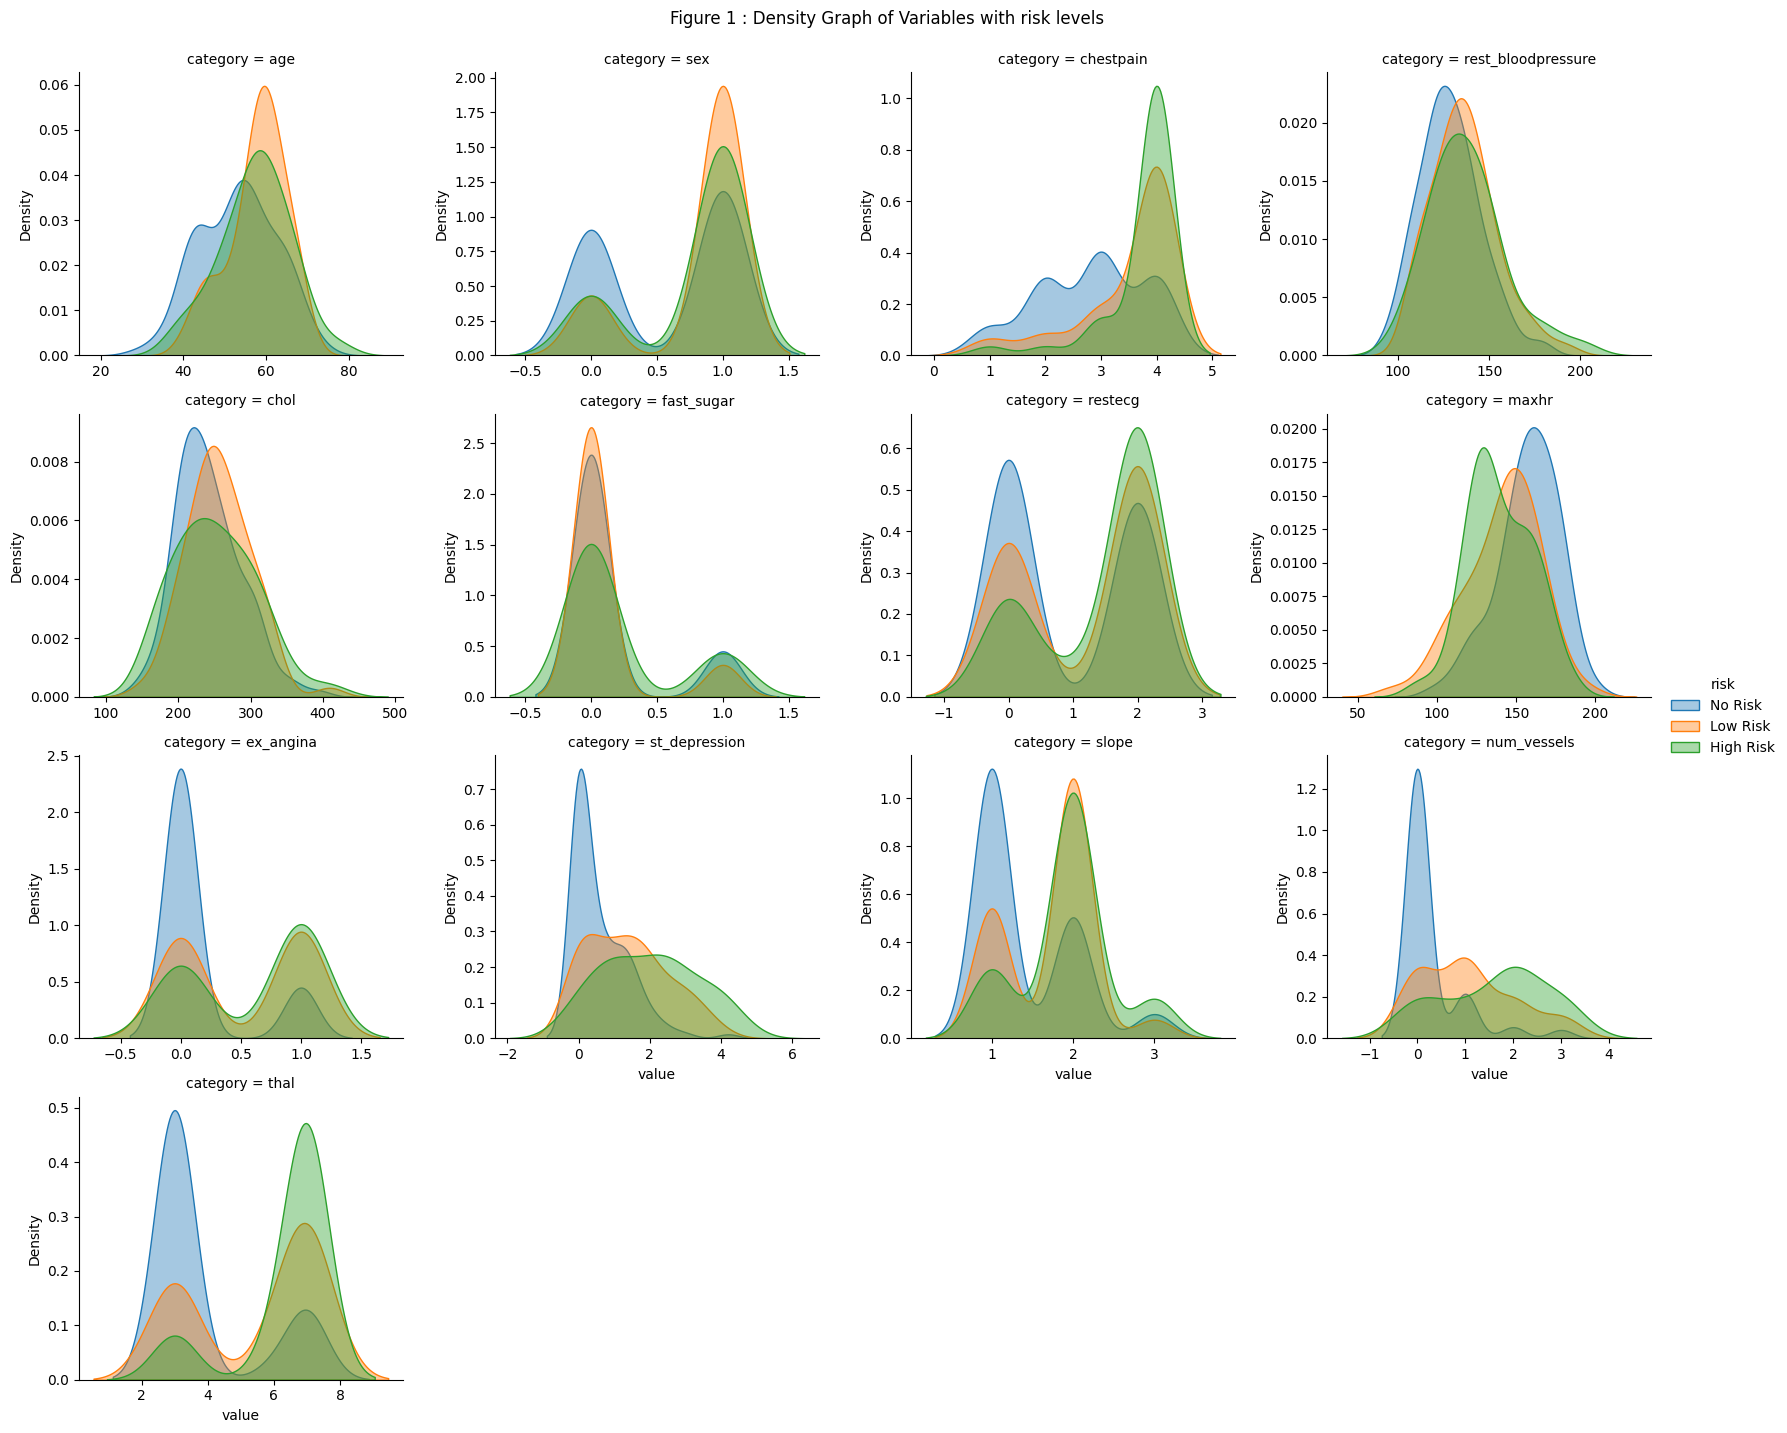

In [ ]:
hd_plot_data = hd_train.melt(id_vars='risk', var_name='category', value_name='value')

g = sns.FacetGrid(hd_plot_data, col='category', hue='risk', col_wrap=4, sharex=False, sharey=False, height=3.5, aspect=1.2)
g.map(sns.kdeplot, 'value', fill=True, alpha=0.4)
g.add_legend()
g.fig.suptitle('Figure 1 : Density Graph of Variables with risk levels', y=1.02)
plt.show()

From Table 3 and Figure 1, we can determine that variables that have little to no correlation are cholesterol levels (chol), fasting blood sugar being greater than 120 mg (fast_sugar), and resting blood pressure (rest_bloodpressure). The other variables show distinct distributions for the level of risks and can be used to train the model. For example, the chest pain levels are lower for those that do not have any risk in heart disease, while it is higher for those that do have a risk of heart disease. Looking at the mean levels of chest pain for each risk category, the ones with low or high risk have a higher level than those with no risk. Similar analysis was done to the other variables, so the variables chosen to train the model were age (age), level of chest pain (chestpain), exercise induced angina (ex_angina), max heart rate achieved (maxhr), number of major vessels colored by fluoroscopy (num_vessels), resting ECG results (restecg), sex (sex), the slope of the peak exercise ST segment (slope), ST depression induced by exercise relative to rest (st_depression), and the type of thalassemia (thal). 

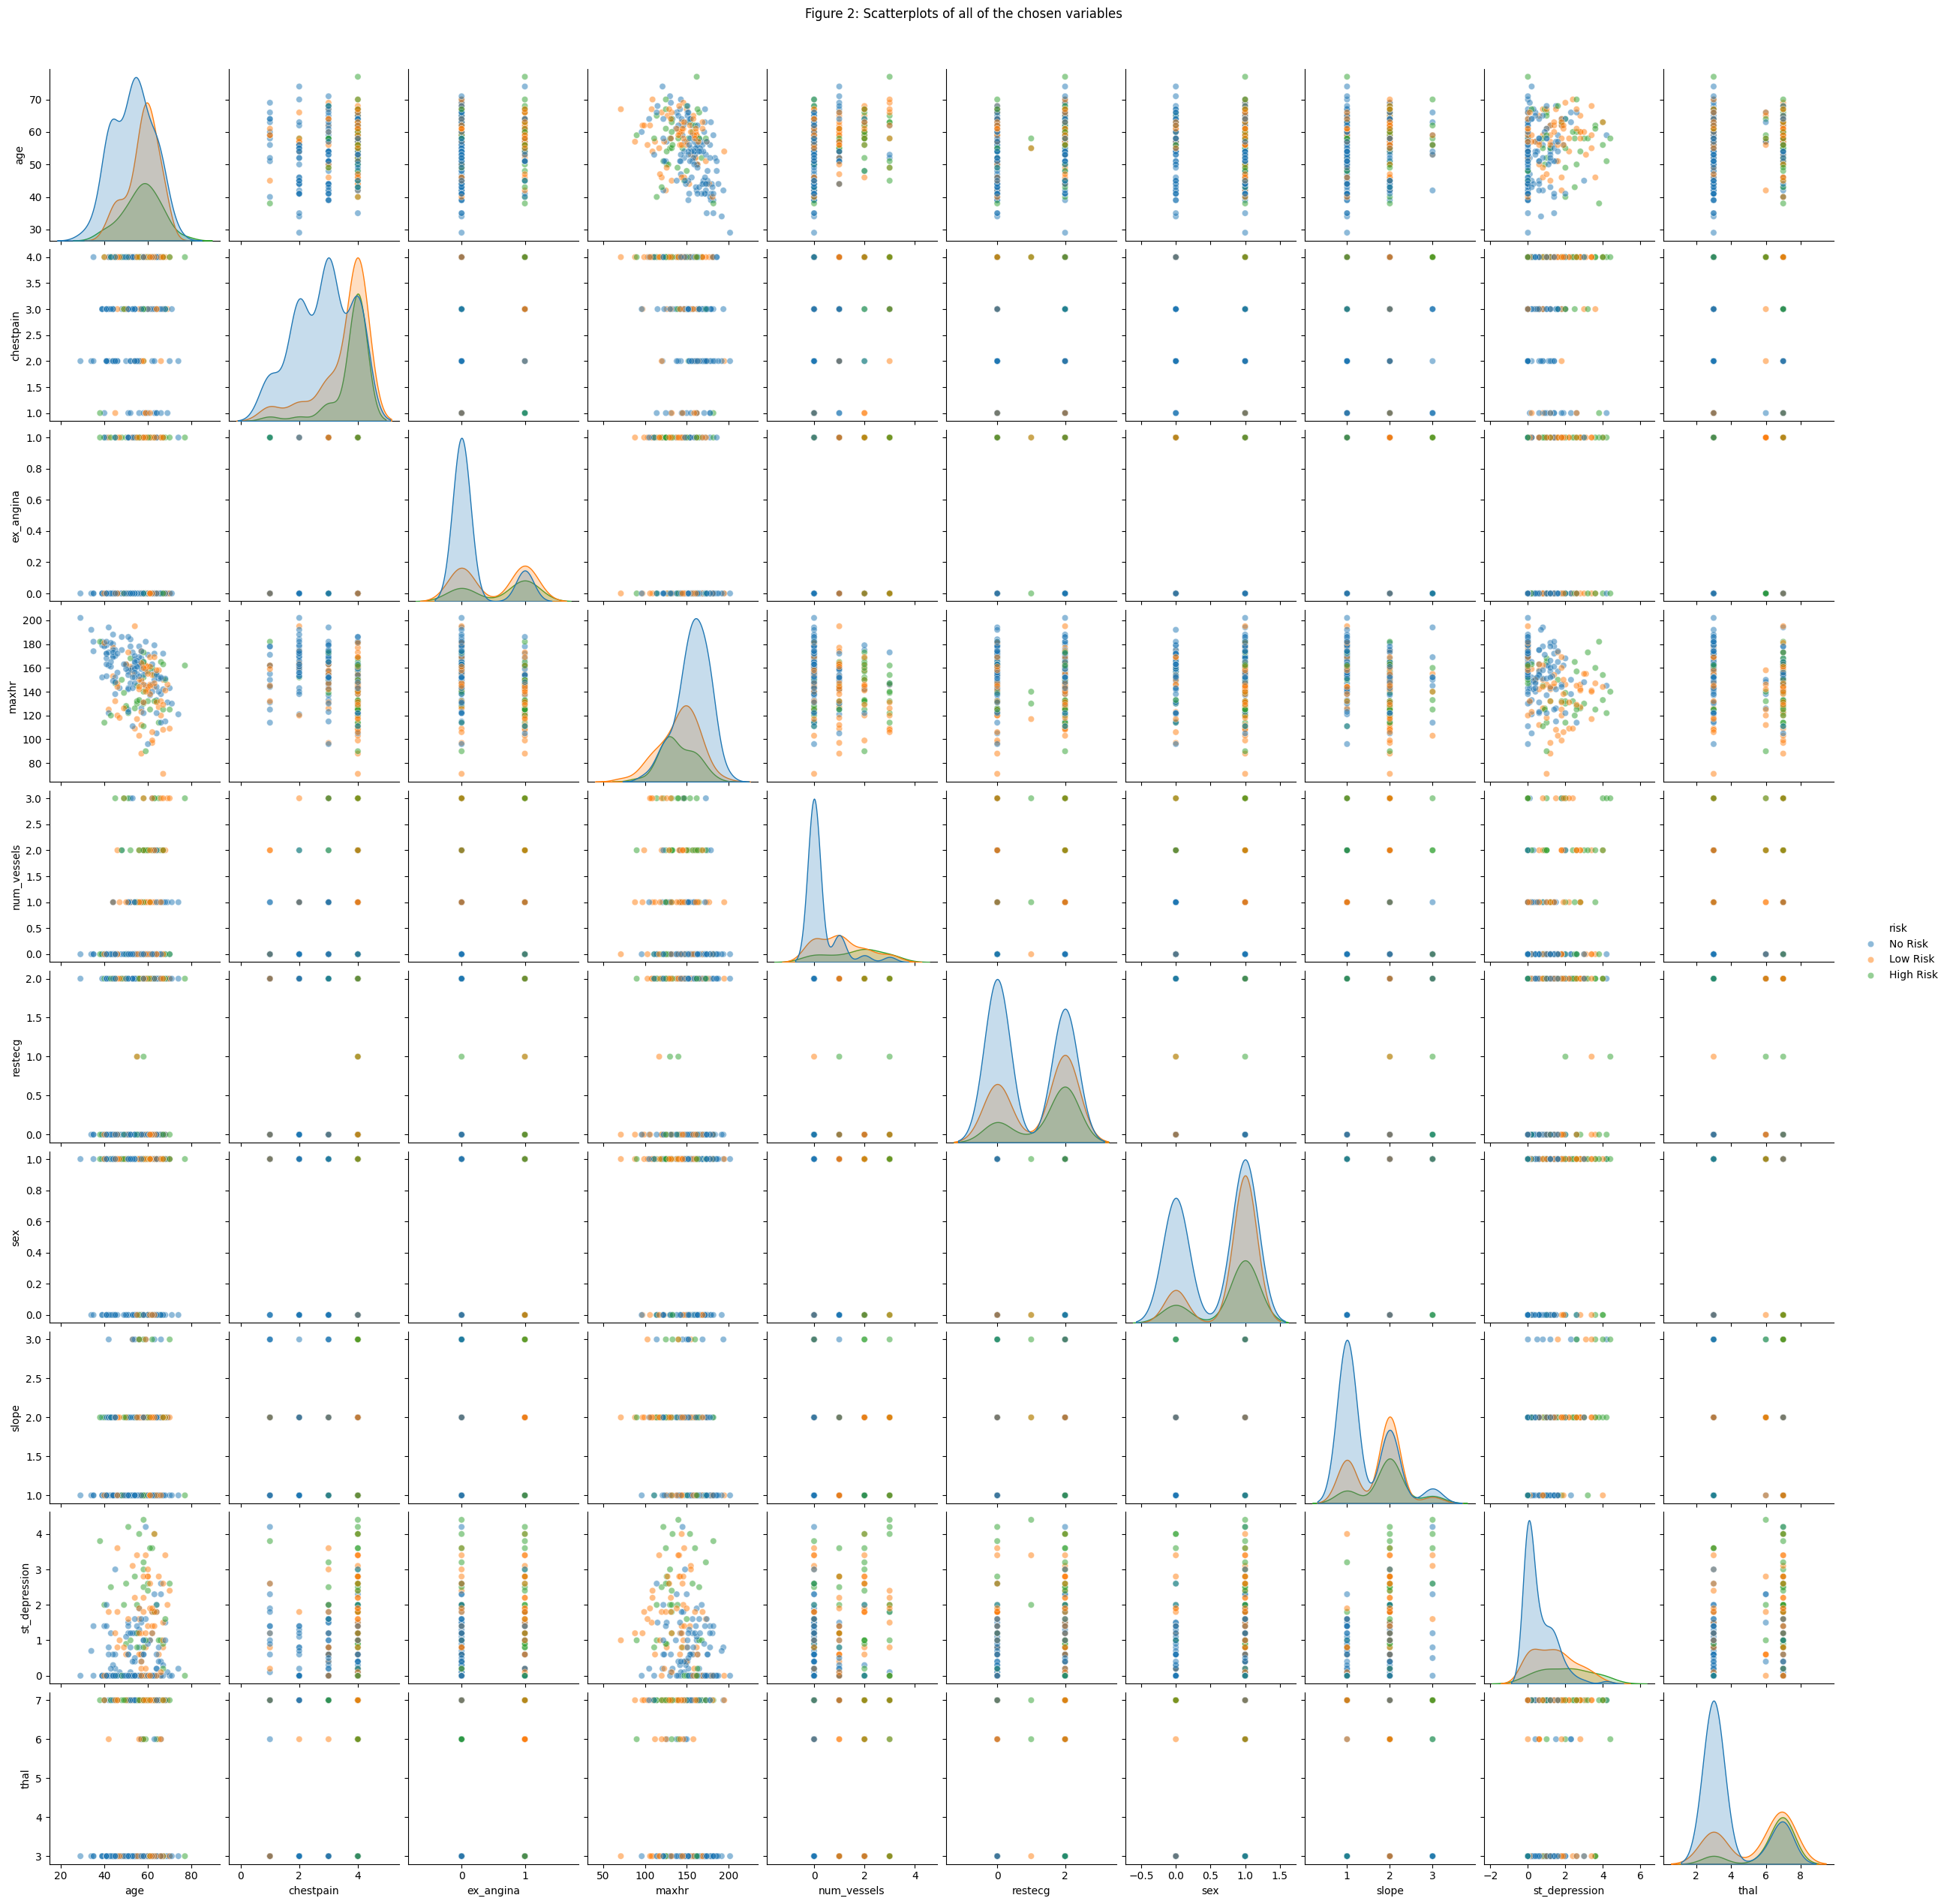

In [ ]:
selected_features = ['age', 'chestpain', 'ex_angina', 'maxhr', 'num_vessels', 'restecg', 'sex', 'slope', 'st_depression', 'thal']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

hd_pairs_data = hd_train[selected_features + ['risk']]
g = sns.pairplot(hd_pairs_data, hue='risk', plot_kws={'alpha': 0.5})
g.fig.suptitle('Figure 2: Scatterplots of all of the chosen variables', y=1.02)
plt.show()

Looking at the scatterplots from Figure 2, the "grouping" or clustering of the risk groups can be seen in the selected variables, which further show that they are variables that can train the model. That being said, the highest amount of clustering were observed in the maxhr vs st_depression and slope vs st_depression plots which will be used to determine if the model is classifying the test set accurately.

### 2.3 Building the Models

First, we'll scale the data, which is a common preprocessing step for many machine learning models.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


#### K-Nearest Neighbors (KNN) Model

In [ ]:
k_vals = range(1, 51)
accuracies = []

for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    accuracies.append(scores.mean())


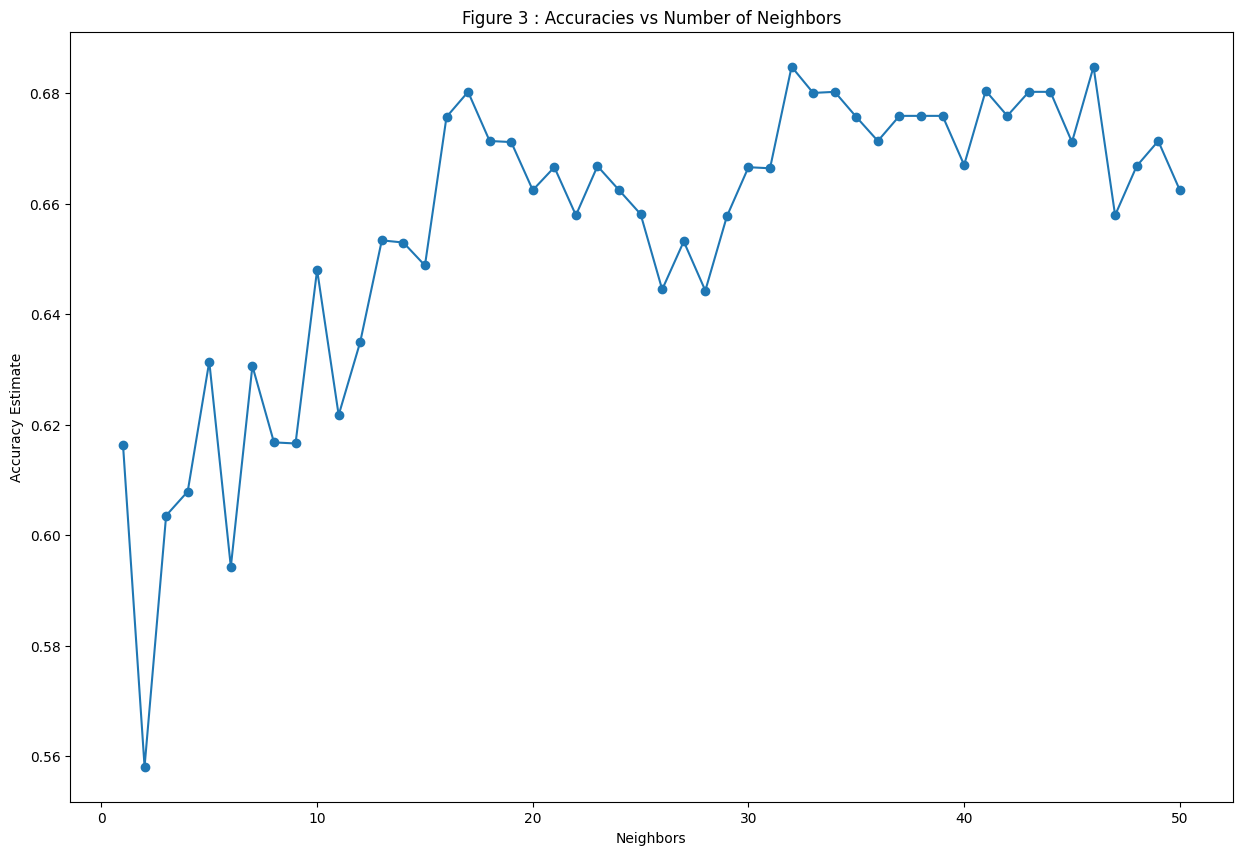

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(k_vals, accuracies, marker='o', linestyle='-')
plt.xlabel("Neighbors")
plt.ylabel("Accuracy Estimate")
plt.title("Figure 3 : Accuracies vs Number of Neighbors")
plt.show()

In [ ]:
best_k = k_vals[np.argmax(accuracies)]
print(f"Best K value: {best_k}")

knn_spec = KNeighborsClassifier(n_neighbors=best_k)
knn_spec.fit(X_train_scaled, y_train)
y_pred = knn_spec.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")

conf_mat = confusion_matrix(y_test, y_pred, labels=["No Risk", "Low Risk", "High Risk"])
conf_mat_df = pd.DataFrame(conf_mat, index=["Pred No Risk", "Pred Low Risk", "Pred High Risk"], columns=["True No Risk", "True Low Risk", "True High Risk"])
print("\nConfusion Matrix for KNN Model:")
print(conf_mat_df)

Best K value: 32
KNN Accuracy: 0.73

Confusion Matrix for KNN Model:
                True No Risk  True Low Risk  True High Risk
Pred No Risk              40              0               0
Pred Low Risk             10             13               0
Pred High Risk             2              8               2


#### Logistic Regression Model

In [ ]:
log_reg = LogisticRegression(random_state=1234, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")

conf_mat_log_reg = confusion_matrix(y_test, y_pred_log_reg, labels=["No Risk", "Low Risk", "High Risk"])
conf_mat_log_reg_df = pd.DataFrame(conf_mat_log_reg, index=["Pred No Risk", "Pred Low Risk", "Pred High Risk"], columns=["True No Risk", "True Low Risk", "True High Risk"])
print("\nConfusion Matrix for Logistic Regression Model:")
print(conf_mat_log_reg_df)

Logistic Regression Accuracy: 0.71

Confusion Matrix for Logistic Regression Model:
                True No Risk  True Low Risk  True High Risk
Pred No Risk              40              0               0
Pred Low Risk             10             11               2
Pred High Risk             2              8               2


#### Support Vector Machine (SVM) Model

In [ ]:
svm_clf = SVC(random_state=1234)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

conf_mat_svm = confusion_matrix(y_test, y_pred_svm, labels=["No Risk", "Low Risk", "High Risk"])
conf_mat_svm_df = pd.DataFrame(conf_mat_svm, index=["Pred No Risk", "Pred Low Risk", "Pred High Risk"], columns=["True No Risk", "True Low Risk", "True High Risk"])
print("\nConfusion Matrix for SVM Model:")
print(conf_mat_svm_df)

SVM Accuracy: 0.73

Confusion Matrix for SVM Model:
                True No Risk  True Low Risk  True High Risk
Pred No Risk              40              0               0
Pred Low Risk             10             13               0
Pred High Risk             1              9               2


#### Decision Tree Model

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=1234)
tree_clf.fit(X_train_scaled, y_train)
y_pred_tree = tree_clf.predict(X_test_scaled)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")

conf_mat_tree = confusion_matrix(y_test, y_pred_tree, labels=["No Risk", "Low Risk", "High Risk"])
conf_mat_tree_df = pd.DataFrame(conf_mat_tree, index=["Pred No Risk", "Pred Low Risk", "Pred High Risk"], columns=["True No Risk", "True Low Risk", "True High Risk"])
print("\nConfusion Matrix for Decision Tree Model:")
print(conf_mat_tree_df)

Decision Tree Accuracy: 0.72

Confusion Matrix for Decision Tree Model:
                True No Risk  True Low Risk  True High Risk
Pred No Risk              39              1               0
Pred Low Risk              7             12               4
Pred High Risk             1              8               3


#### Random Forest Model

In [ ]:
rf_clf = RandomForestClassifier(random_state=1234)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

conf_mat_rf = confusion_matrix(y_test, y_pred_rf, labels=["No Risk", "Low Risk", "High Risk"])
conf_mat_rf_df = pd.DataFrame(conf_mat_rf, index=["Pred No Risk", "Pred Low Risk", "Pred High Risk"], columns=["True No Risk", "True Low Risk", "True High Risk"])
print("\nConfusion Matrix for Random Forest Model:")
print(conf_mat_rf_df)

Random Forest Accuracy: 0.73

Confusion Matrix for Random Forest Model:
                True No Risk  True Low Risk  True High Risk
Pred No Risk              40              0               0
Pred Low Risk              9             12               2
Pred High Risk             2              7               3


#### Gradient Boosting Model

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=1234)
gb_clf.fit(X_train_scaled, y_train)
y_pred_gb = gb_clf.predict(X_test_scaled)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")

conf_mat_gb = confusion_matrix(y_test, y_pred_gb, labels=["No Risk", "Low Risk", "High Risk"])
conf_mat_gb_df = pd.DataFrame(conf_mat_gb, index=["Pred No Risk", "Pred Low Risk", "Pred High Risk"], columns=["True No Risk", "True Low Risk", "True High Risk"])
print("\nConfusion Matrix for Gradient Boosting Model:")
print(conf_mat_gb_df)

Gradient Boosting Accuracy: 0.65

Confusion Matrix for Gradient Boosting Model:
                True No Risk  True Low Risk  True High Risk
Pred No Risk              35              5               0
Pred Low Risk             10             10               3
Pred High Risk             1              7               4


### 2.4 Visualizing Model Decision Boundaries and Feature Importances

To visualize the decision boundaries, we will retrain the models on two of the most influential features: `st_depression` and `maxhr`, and also `thal` and `chestpain`.

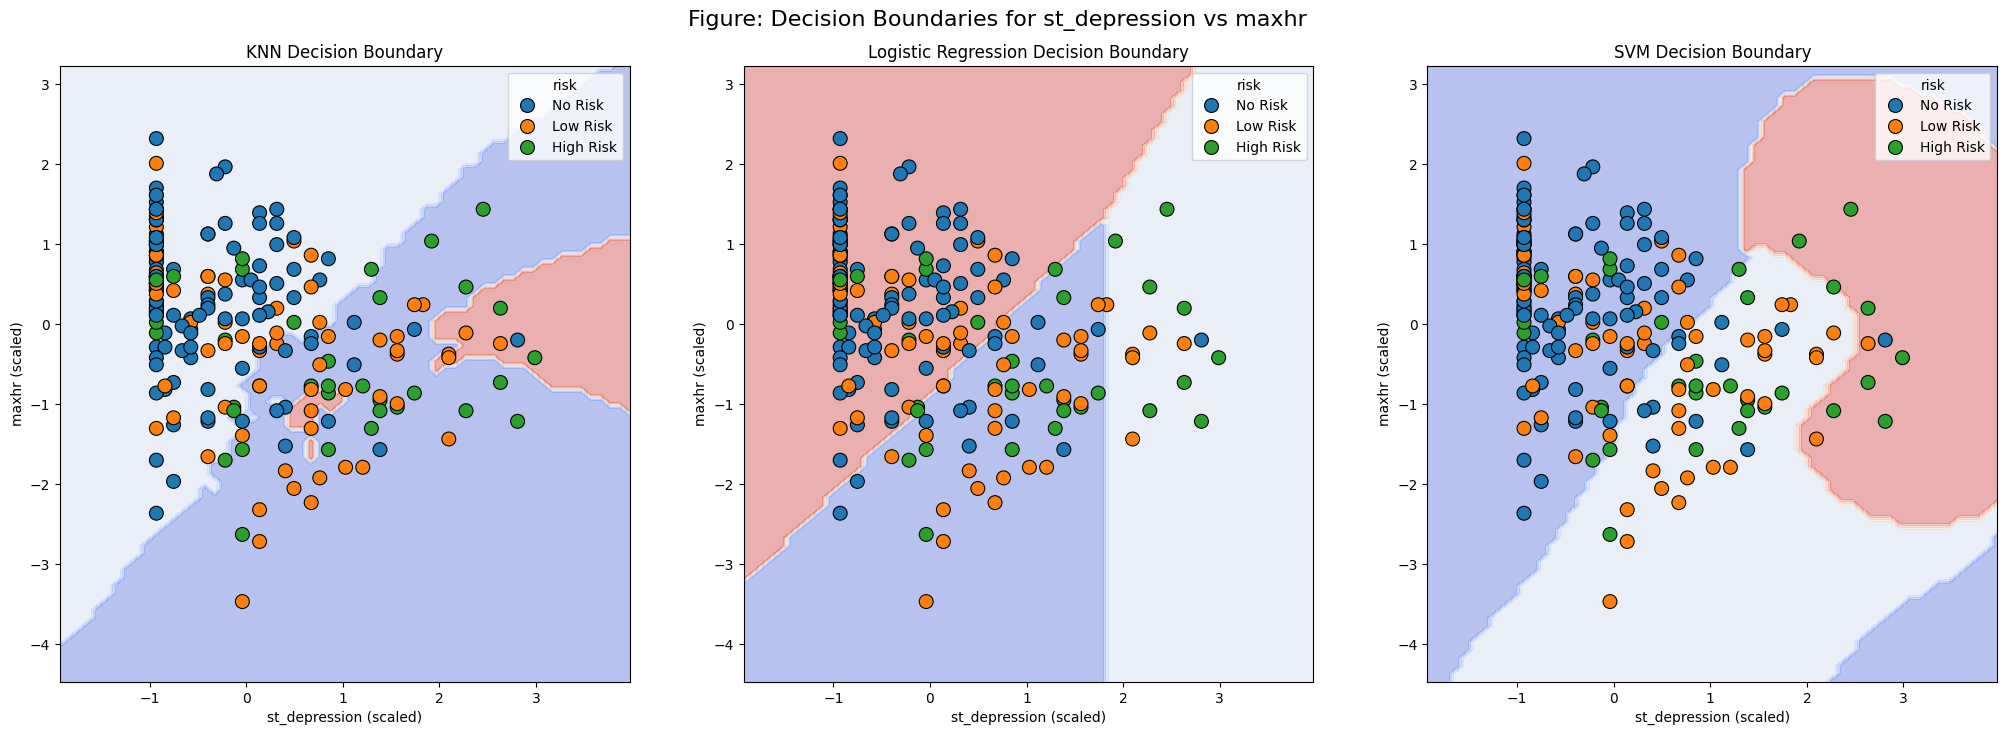

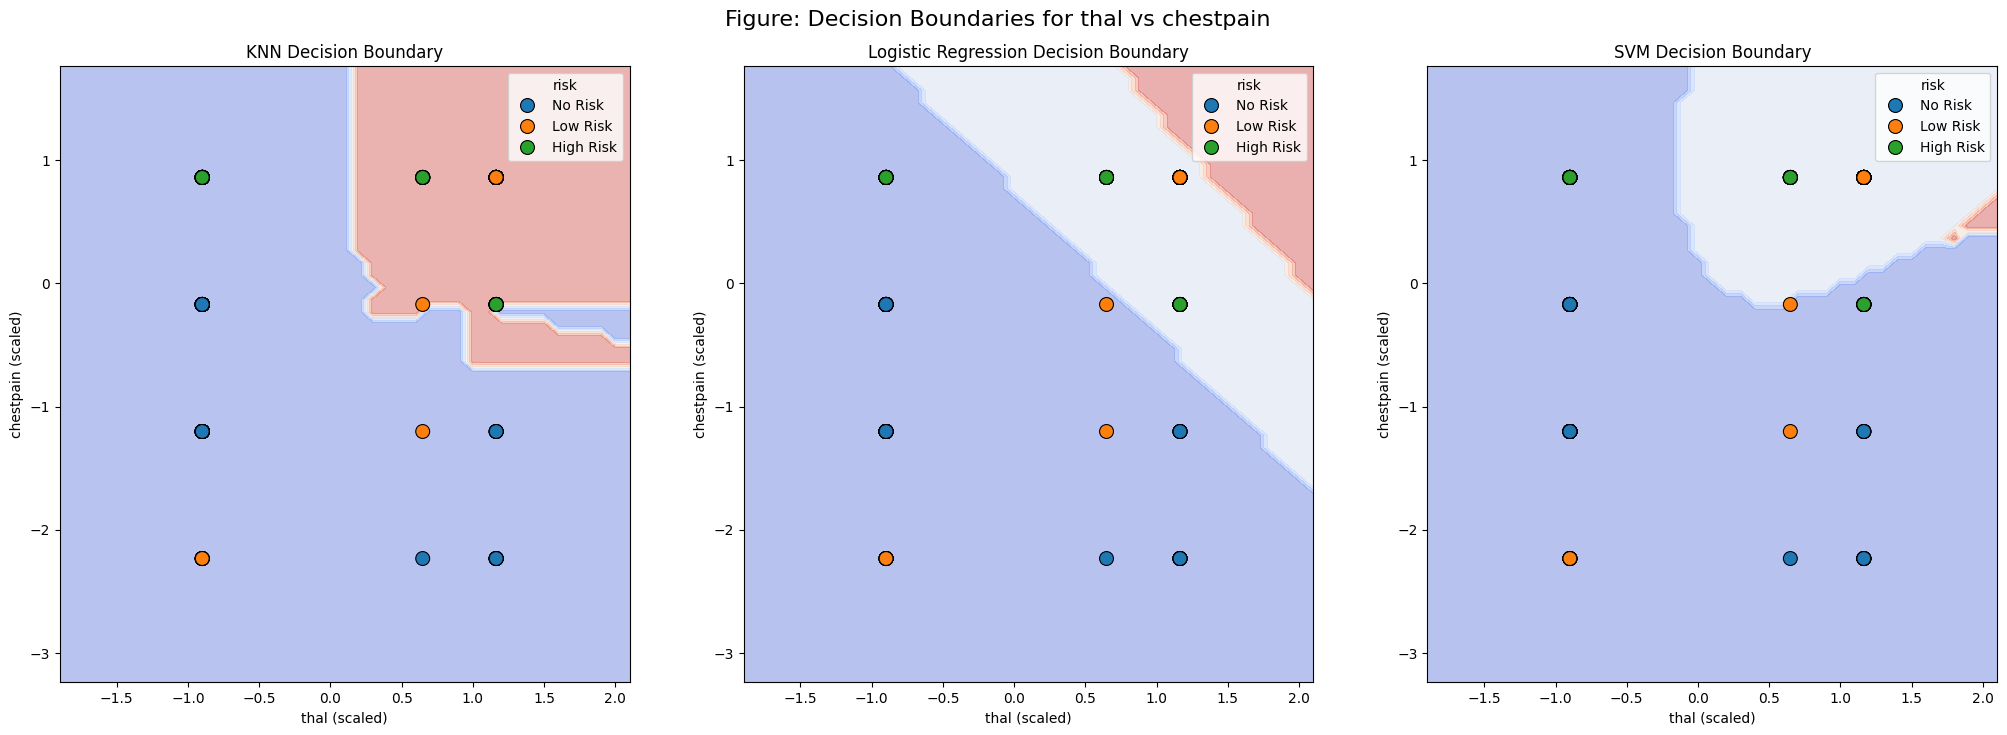

In [ ]:
feature_pairs = [('st_depression', 'maxhr'), ('thal', 'chestpain')]
models = {
    'KNN': KNeighborsClassifier(n_neighbors=best_k),
    'Logistic Regression': LogisticRegression(random_state=1234, solver='lbfgs'),
    'SVM': SVC(random_state=1234)
}

for pair in feature_pairs:
    X_train_viz = X_train[list(pair)]
    X_test_viz = X_test[list(pair)]

    scaler_viz = StandardScaler()
    X_train_scaled_viz = scaler_viz.fit_transform(X_train_viz)

    x_min, x_max = X_train_scaled_viz[:, 0].min() - 1, X_train_scaled_viz[:, 0].max() + 1
    y_min, y_max = X_train_scaled_viz[:, 1].min() - 1, X_train_scaled_viz[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    fig, axes = plt.subplots(1, 3, figsize=(25, 8))

    for i, (model_name, model) in enumerate(models.items()):
        model.fit(X_train_scaled_viz, y_train)
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = pd.factorize(Z)[0].reshape(xx.shape)

        axes[i].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
        sns.scatterplot(x=X_train_scaled_viz[:, 0], y=X_train_scaled_viz[:, 1], hue=y_train, s=100, edgecolor='k', ax=axes[i])
        axes[i].set_title(f'{model_name} Decision Boundary')
        axes[i].set_xlabel(f'{pair[0]} (scaled)')
        axes[i].set_ylabel(f'{pair[1]} (scaled)')
    
    fig.suptitle(f'Figure: Decision Boundaries for {pair[0]} vs {pair[1]}', fontsize=16, y=0.95)
    plt.show()

#### Decision Tree Visualization

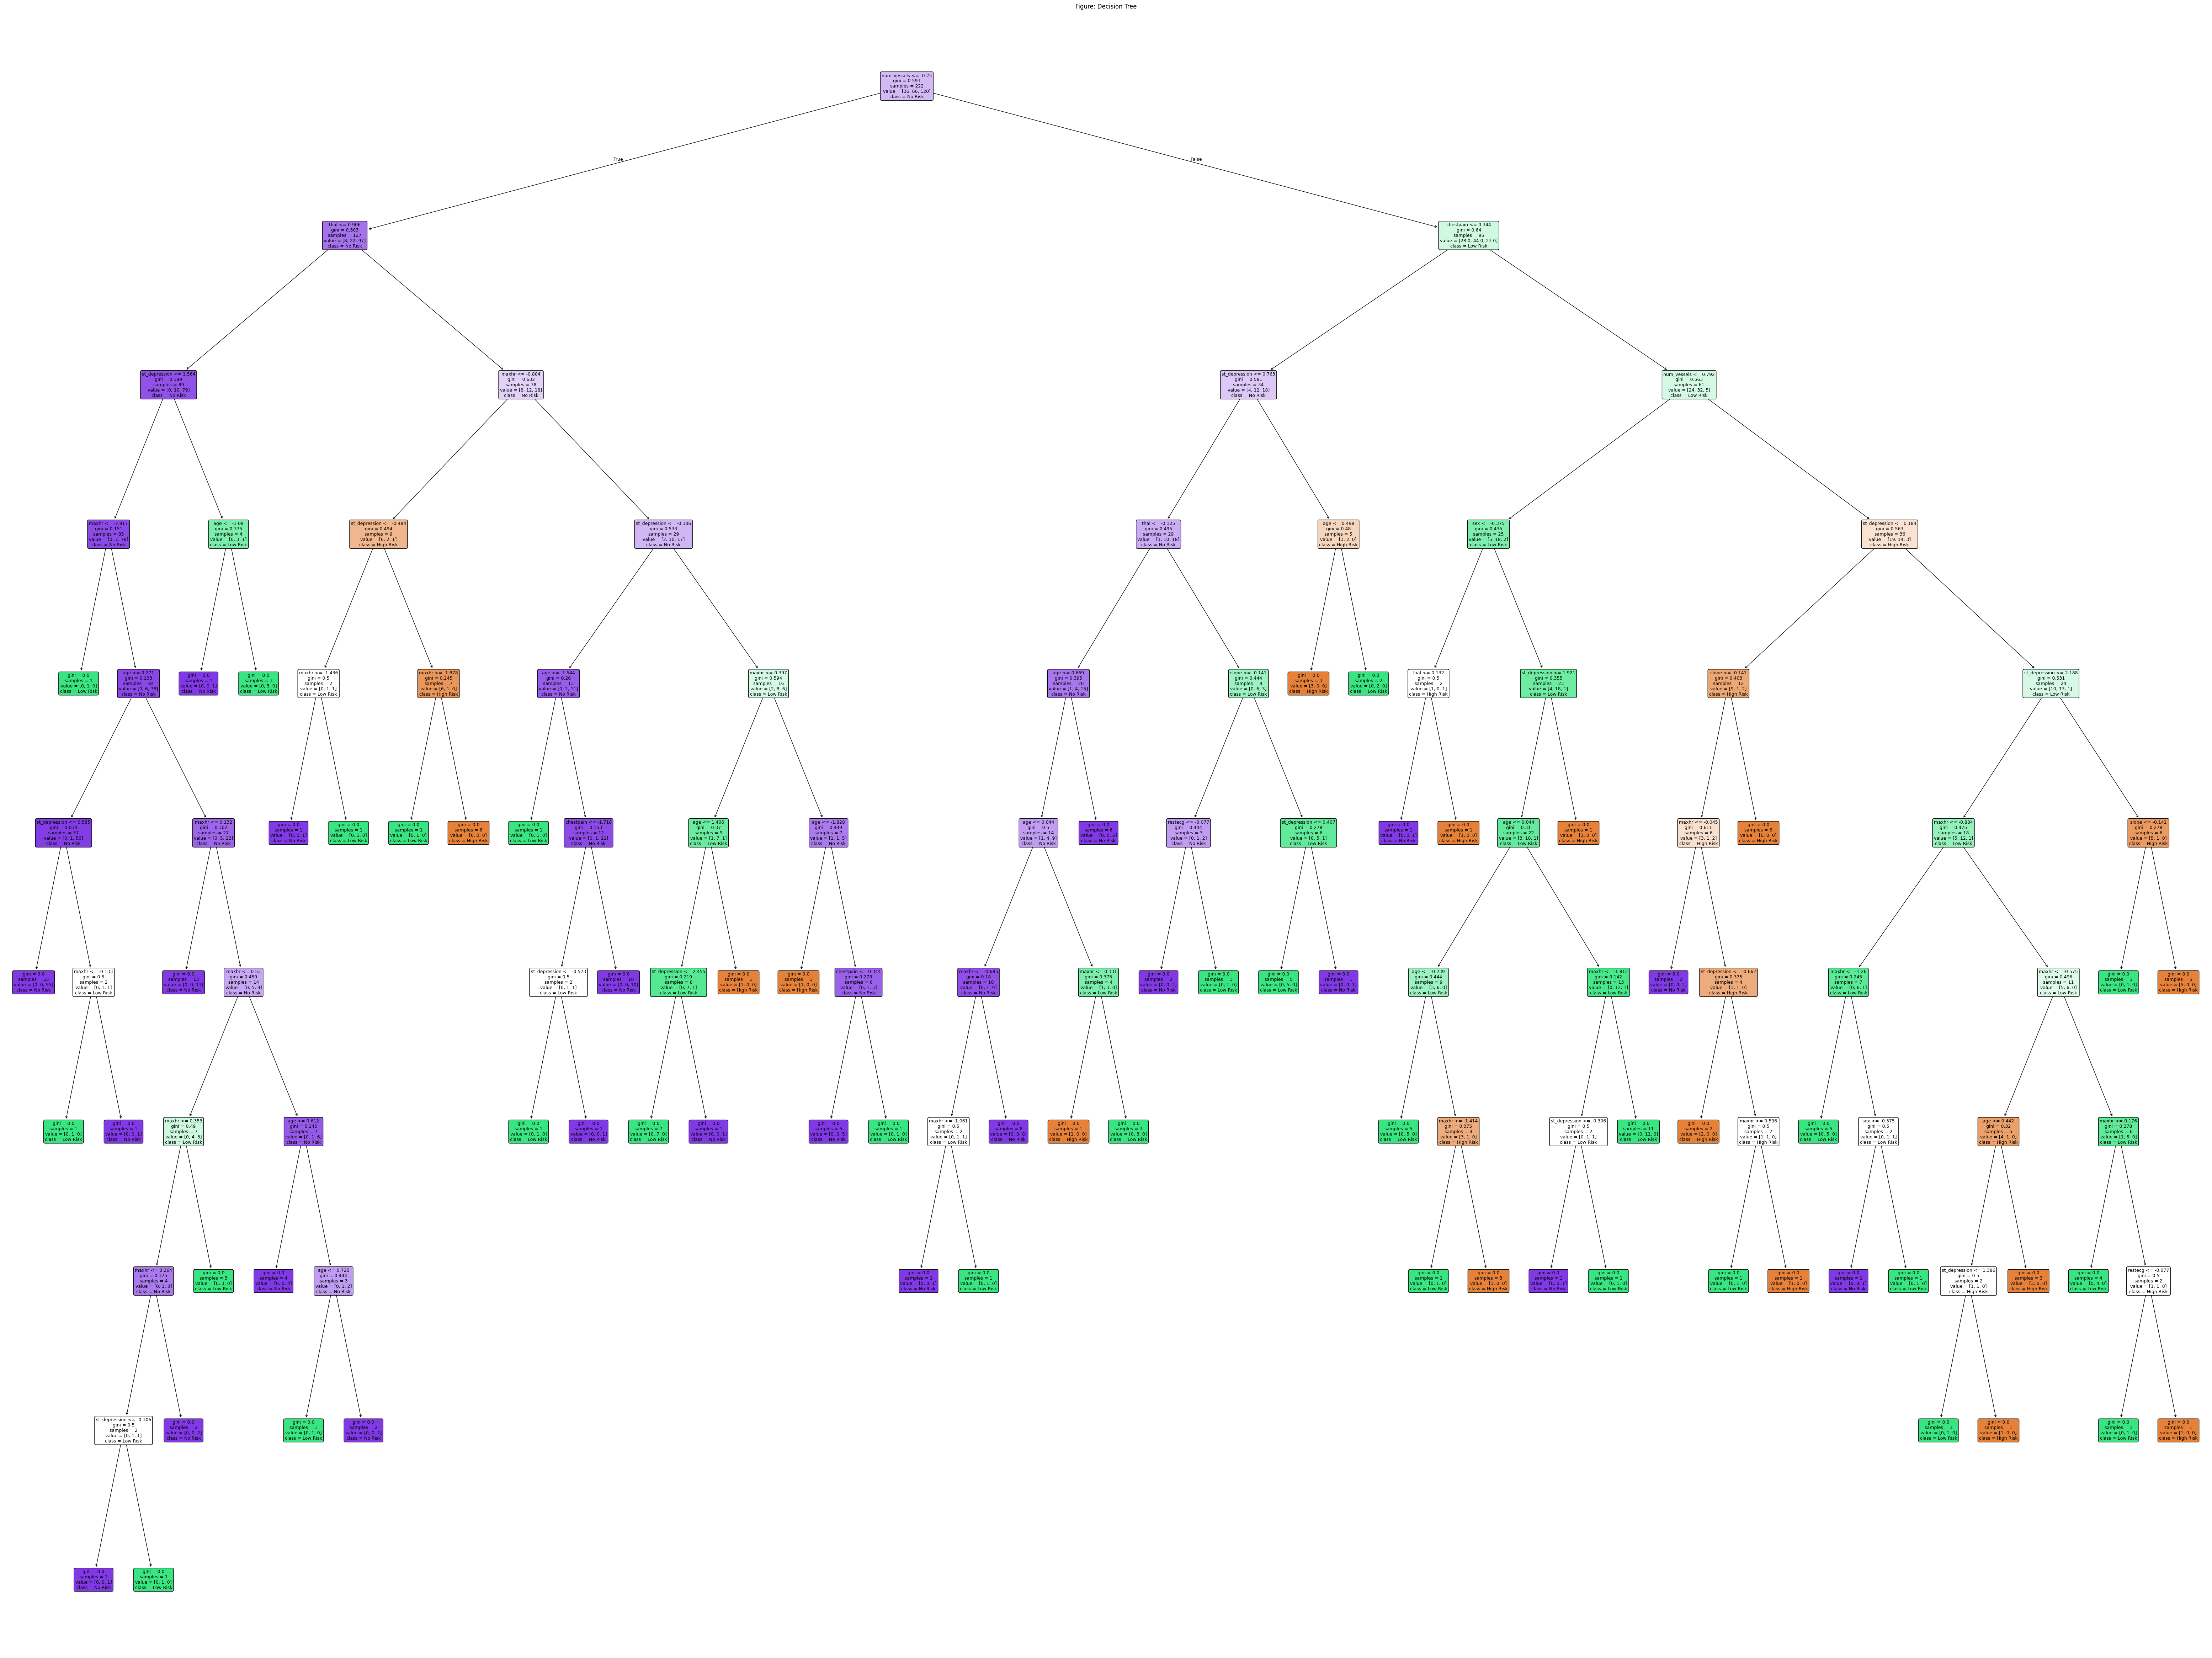

In [ ]:
plt.figure(figsize=(80, 60))
plot_tree(tree_clf, feature_names=selected_features, class_names=sorted(y.unique()), filled=True, rounded=True)
plt.title("Figure: Decision Tree")
plt.show()

#### Visualizing a Single Tree from the Random Forest

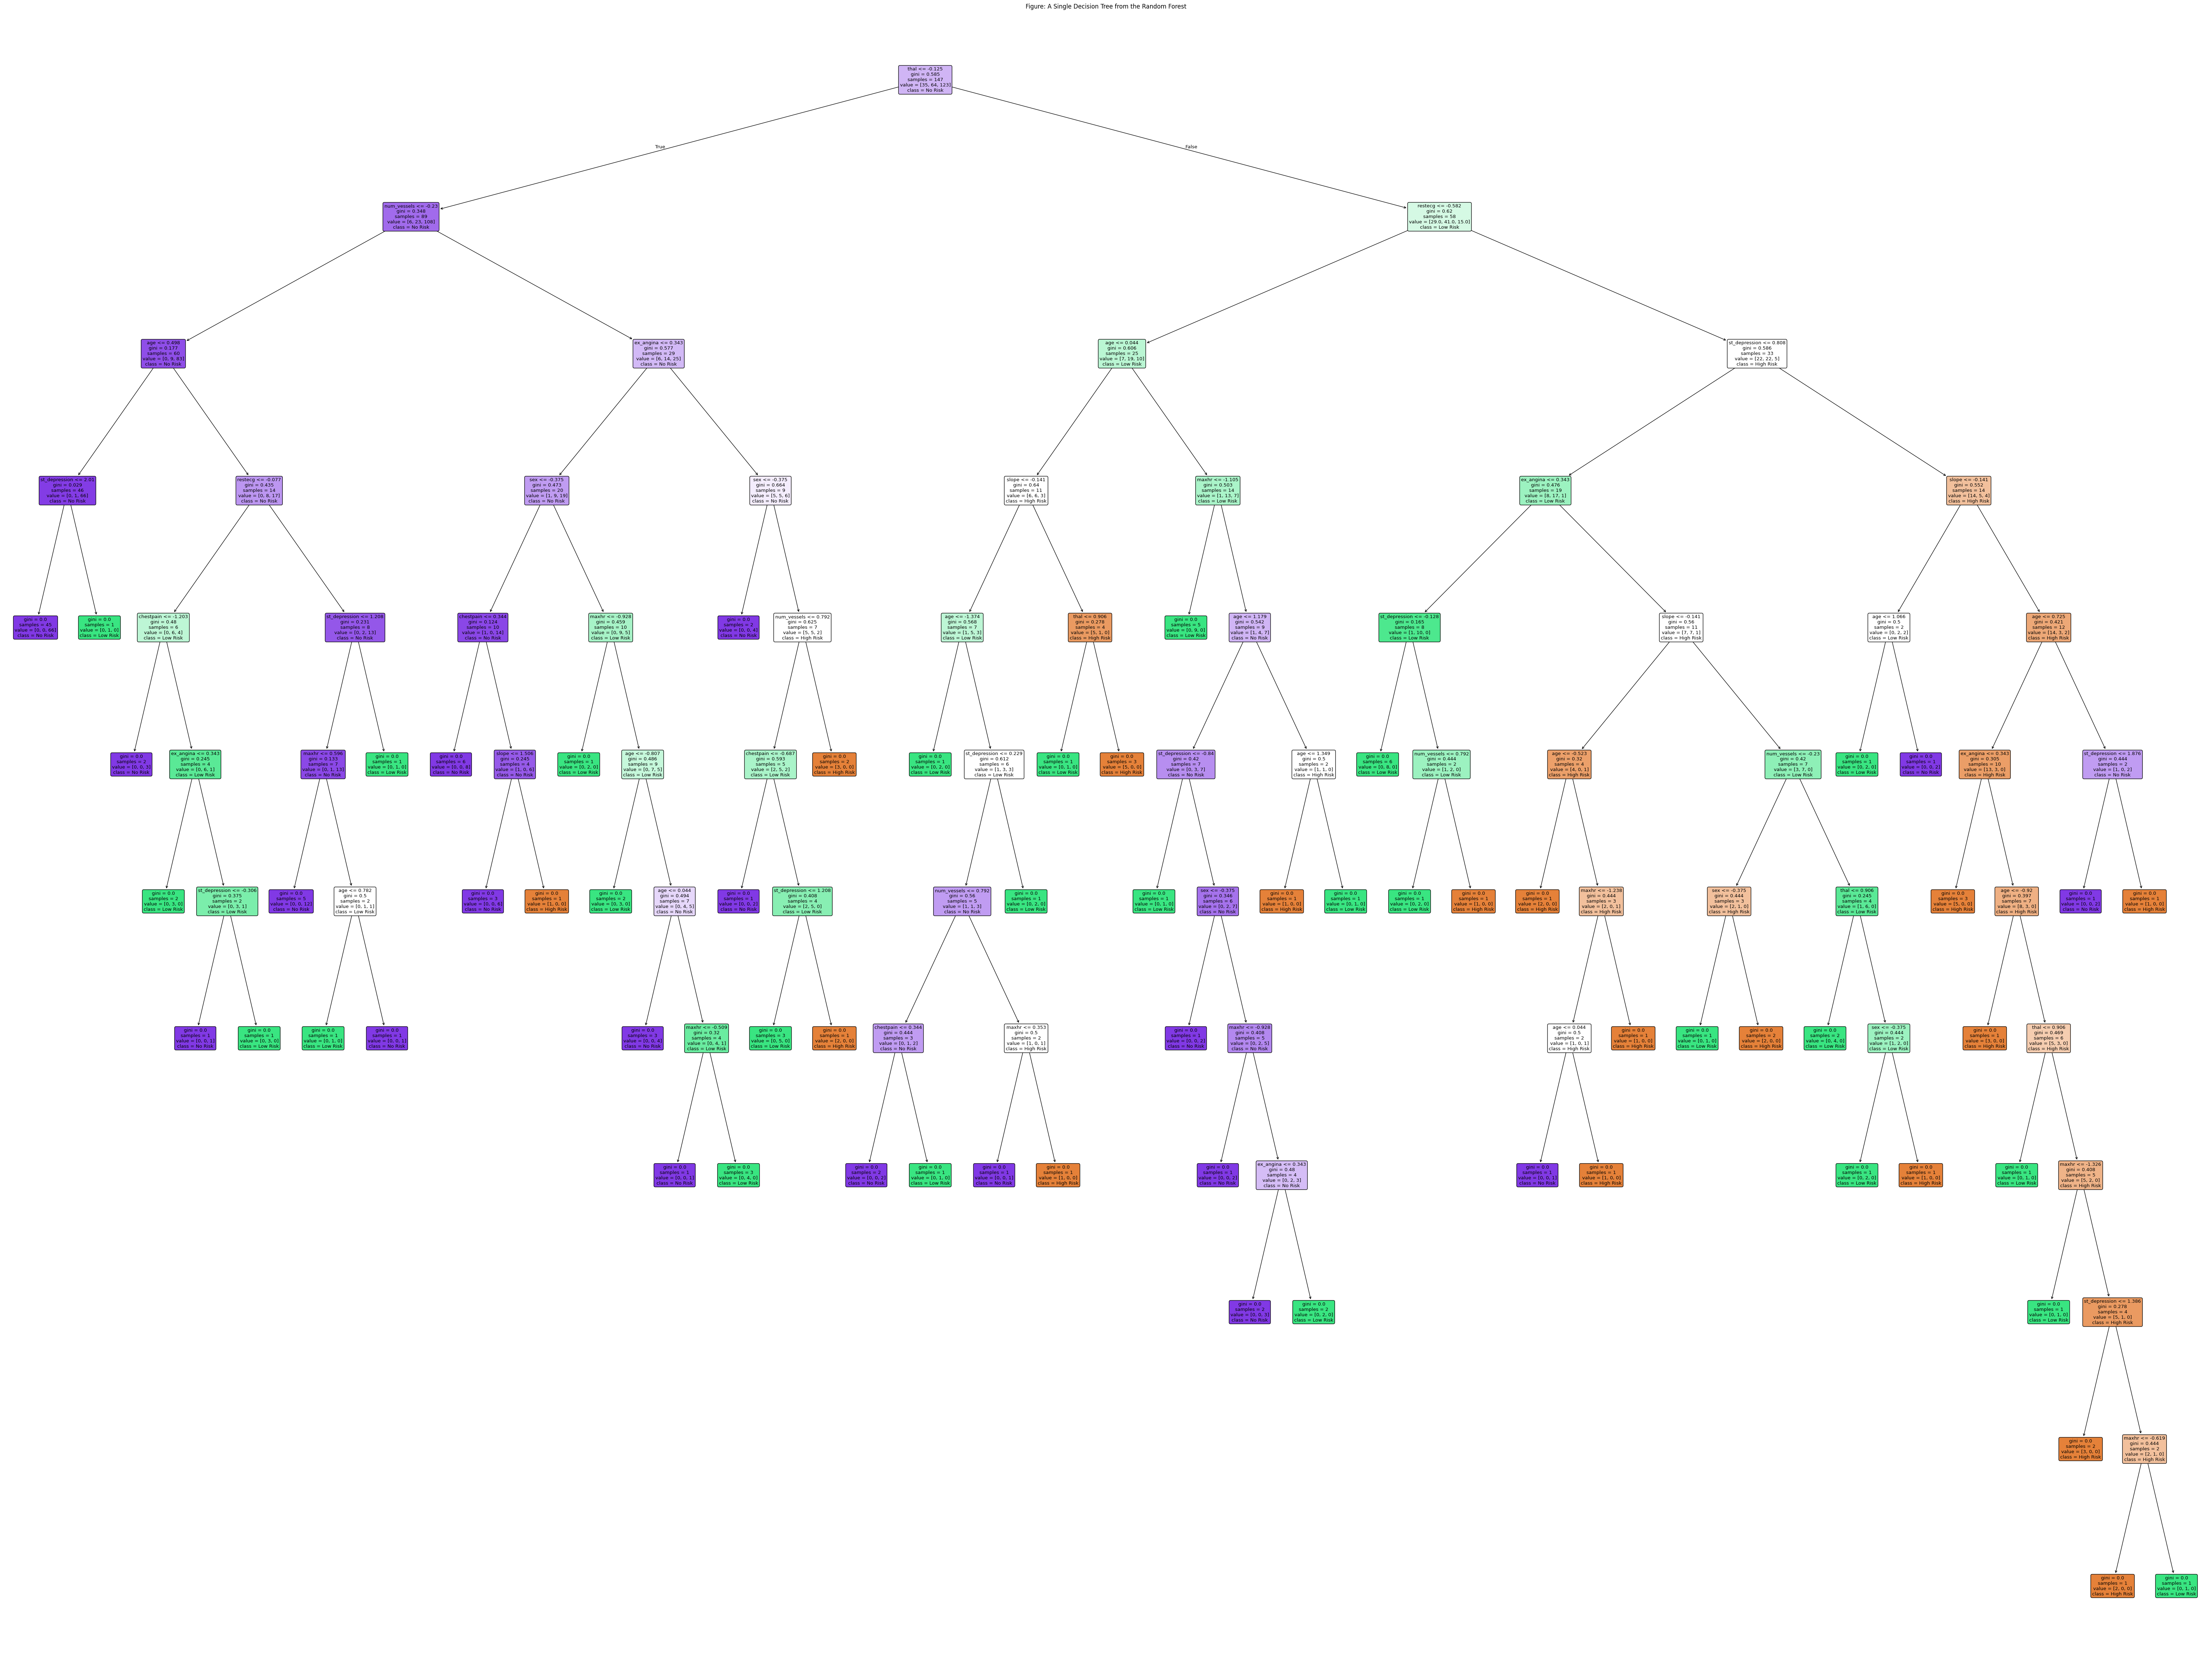

In [ ]:
plt.figure(figsize=(80, 60))
plot_tree(rf_clf.estimators_[0], feature_names=selected_features, class_names=sorted(y.unique()), filled=True, rounded=True)
plt.title("Figure: A Single Decision Tree from the Random Forest")
plt.show()

#### Feature Importances for Random Forest and Gradient Boosting

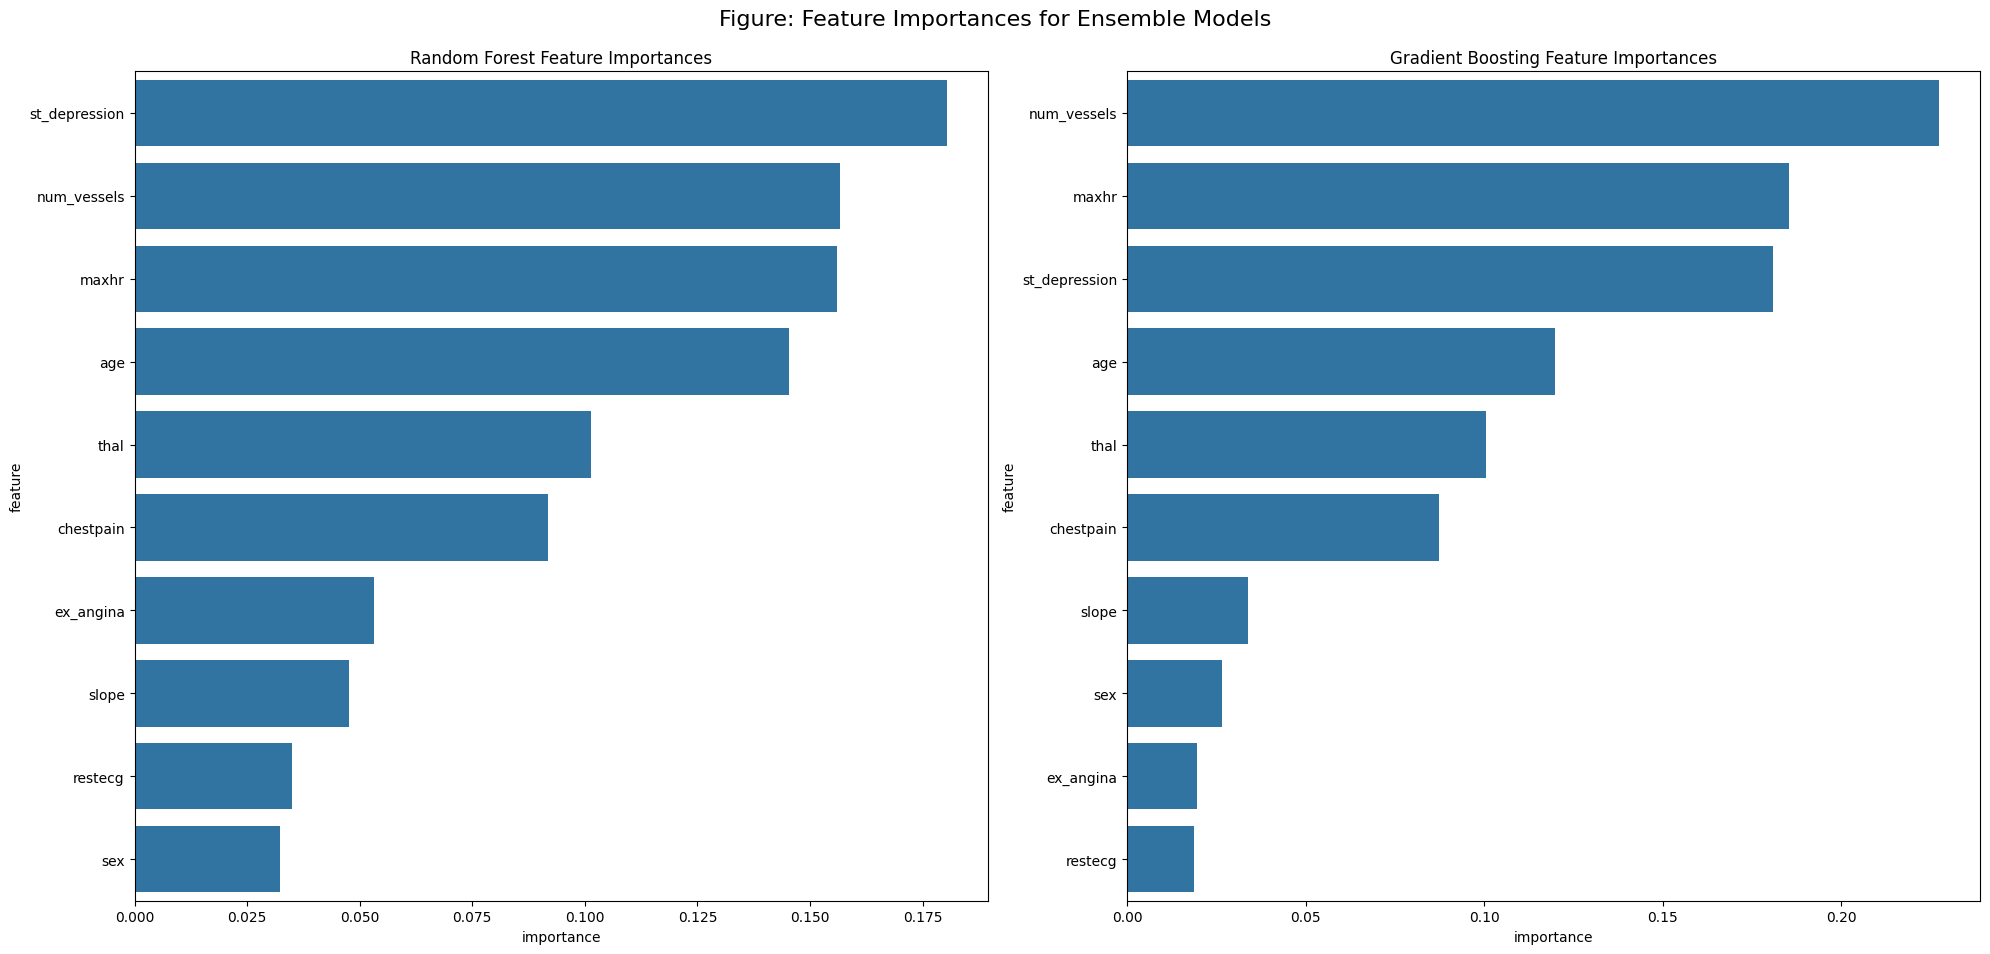

In [ ]:
feature_importances_rf = pd.DataFrame({'feature': selected_features, 'importance': rf_clf.feature_importances_})
feature_importances_gb = pd.DataFrame({'feature': selected_features, 'importance': gb_clf.feature_importances_})

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(data=feature_importances_rf.sort_values(by='importance', ascending=False), x='importance', y='feature', ax=axes[0])
axes[0].set_title('Random Forest Feature Importances')

sns.barplot(data=feature_importances_gb.sort_values(by='importance', ascending=False), x='importance', y='feature', ax=axes[1])
axes[1].set_title('Gradient Boosting Feature Importances')

fig.suptitle('Figure: Feature Importances for Ensemble Models', fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3. Discussion

We explored several classification models to predict heart disease risk. Here's a summary of their accuracies on the test set:

* **K-Nearest Neighbors (KNN):** 73%
* **Logistic Regression:** 71%
* **Support Vector Machine (SVM):** 73%
* **Decision Tree:** 72%
* **Random Forest:** 73%
* **Gradient Boosting:** 65%

The K-Neartest Neighbors (KNN), Support Vector Machine (SVM), Random Forfest models achieved the highest accuracy of 73%, followed by the decision tree model at 72%. The worst performing model was Gradient Boosting with an accuracy of 65%.

Upon examining the confusion matrices, a common theme emerges: all models struggled to correctly identify 'High Risk' cases. This is likely due to the imbalanced nature of the dataset, with very few examples of high-risk patients for the models to learn from. The models tended to classify 'High Risk' patients as 'Low Risk' instead.

The decision boundary plots for KNN, Logistic Regression, and SVM visualize how these models separate the classes. We can see that the decision boundaries are quite different, reflecting the different ways these algorithms learn. The SVM, with its more complex boundary, was able to achieve the highest accuracy.

The feature importance plots for the Random Forest and Gradient Boosting models show that features like `thal`, `chestpain`, and `num_vessels` are consistently ranked as highly important. This aligns with our initial exploratory data analysis.

In a medical context, the inability to correctly identify high-risk patients is a significant concern. While an accuracy of 73% is a good starting point, further improvements are needed for a model to be clinically useful. This could involve gathering more data, especially for high-risk patients, or exploring more advanced techniques for handling imbalanced data.


## 4. Works Cited

About heart disease. Centers for Disease Control and Prevention. (2022, July 12). Retrieved March 2, 2023, from https://www.cdc.gov/heartdisease/about.htm 

Robert, D. Heart Disease Data Set. UCI Machine Learning Repository. Retrieved March 2, 2023, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease 

Rowden, A. (July, 2022). St depression on ECG: What it means and causes. Retrieved March 2, 2023. from https://www.medicalnewstoday.com/articles/st-depression-on-ecg 

U.S. health care from a global perspective, 2019: Higher spending, worse outcomes? U.S. Health …Care from a Global Perspective, 2019 | Commonwealth Fund. (2020, January 30). Retrieved March 2, 2023, from https://www.commonwealthfund.org/publications/issue-briefs/2020/jan/us-health-care-global-perspective-2019#:~:text=More%20than%20one%2Dquarter%20of,less%20in%20all%20other%20countries 
